In [1]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
%matplotlib inline
import pandas as pd

import requests
import io

In [2]:
url = 'http://landregistry.data.gov.uk/app/ukhpi/download/new.csv?utf8=✓&region=http%3A%2F%2Flandregistry.data.gov.uk%2Fid%2Fregion%2Funited-kingdom&location-type=country&region-selection=http%3A%2F%2Flandregistry.data.gov.uk%2Fid%2Fregion%2Funited-kingdom&from=2005-01&to=2017-11&ai[]=percentageChange&ac[]=&cs[]=salesVolume'
urlData = requests.get(url).content
voldata = pd.read_csv(io.StringIO(urlData.decode('utf-8')),index_col=3)
voldata = voldata[['SalesVolume']].sort_index().dropna()
voldata['per'] = voldata.index
voldata.head()

,SalesVolume,per
Period,,
2005-01,67791.0,2005-01
2005-02,69182.0,2005-02
2005-03,83254.0,2005-03
2005-04,102500.0,2005-04
2005-05,103101.0,2005-05


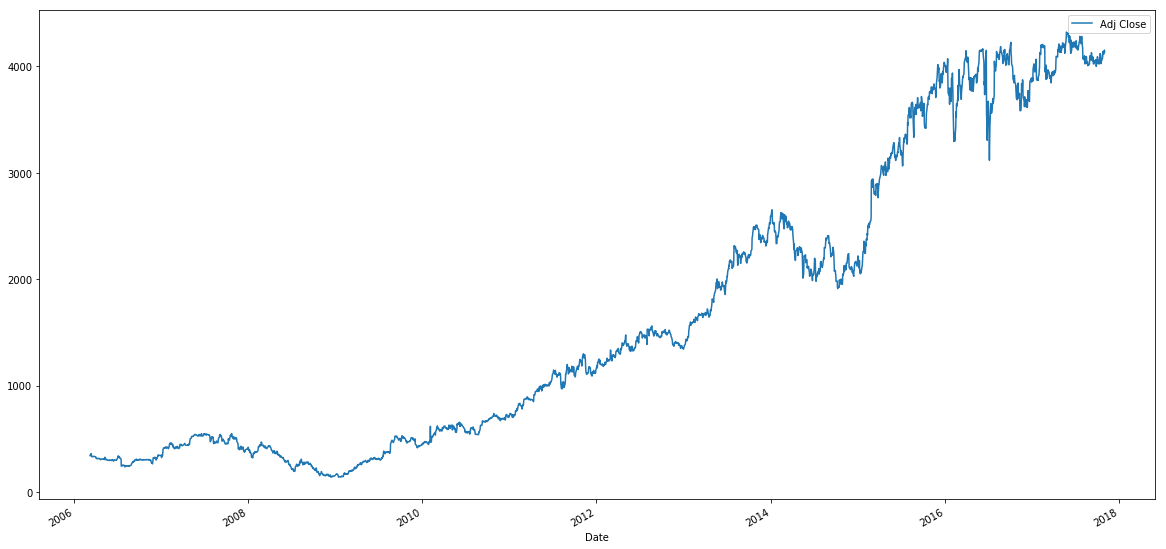

In [3]:
import pandas_datareader.data as web
import datetime
start = datetime.datetime(2006, 3, 10)
end = datetime.datetime(2017, 11, 1)
f = web.DataReader("RMV.L", 'yahoo', start, end)
f = f[['Adj Close']]
f.plot(figsize=(20,10))

In [21]:
f['per'] = f.index.to_period('M').strftime('%Y-%m').astype('str') 
f.head()

,Adj Close,per
Date,,
2006-03-10,341.126373,2006-03
2006-03-13,356.997803,2006-03
2006-03-14,359.606812,2006-03
2006-03-15,359.824249,2006-03
2006-03-16,340.908997,2006-03


In [35]:
# hola = pd.merge(f, voldata, on='per', how='outer')
newdata = f.join(voldata, on='per', how='left', lsuffix='_left', rsuffix='_right')
newdata = newdata[['Adj Close','SalesVolume']]

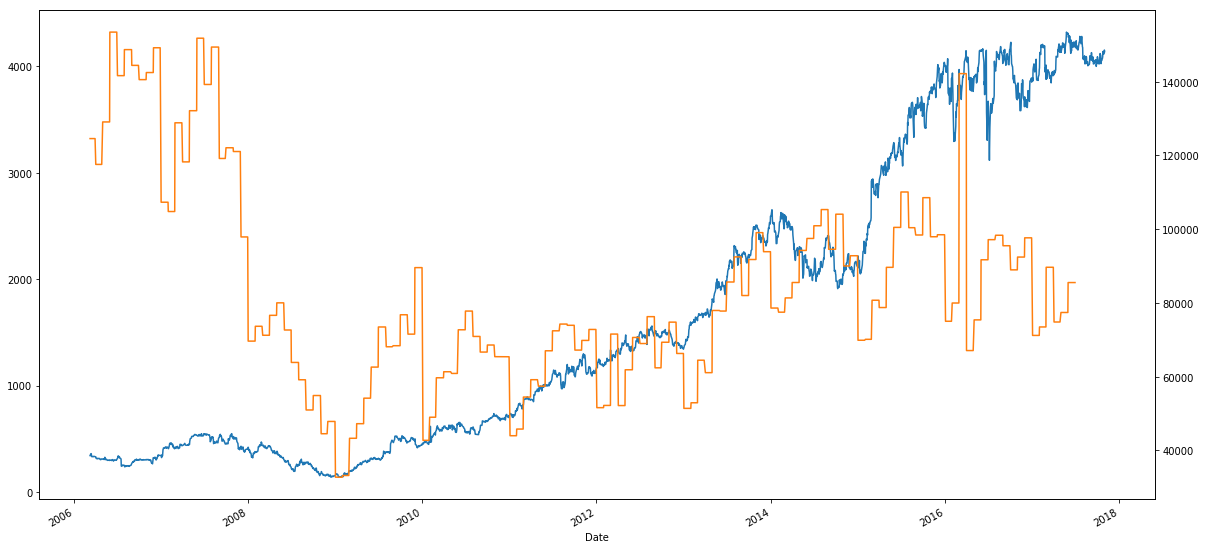

In [40]:
_, ax = plt.subplots(sharex=True,figsize=(20,10))
newdata['Adj Close'].plot(kind='line')
newdata['SalesVolume'].plot(kind='line',secondary_y=True,ax=ax)

<div style='color:red; font-size:15px'>Difficult to identify any patterns based just on absolute levels -> further analysis would need to be carried out looking at patterns within price changes.</div>